## Варфоломеева Анастасия

### Вариант 8
$$\frac{\partial u}{\partial t} = \Delta u$$
$$u|_{x=0}=0, \quad u|_{x=l_x}=0$$
$$u|_{y=0}=0, \quad u|_{y=l_y}=0$$
$$u|_{t=0} = \cos(3x)\sin(4y)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#начальное условие
def u0(x, y):
    return np.cos(3*x)*np.sin(4*y)

In [3]:
x_bound = np.pi/3
y_bound = np.pi/2
step = 0.03
tau = 0.001
T = 1

In [4]:
Nx = int(np.round(x_bound/step) + 1)
Ny = int(np.round(x_bound/step) + 1)
Nt = int(np.round(T/tau) + 1)

x = np.linspace(0, x_bound, Nx)
y = np.linspace(0, y_bound, Ny)
t = np.linspace(0, T, Nt)

In [5]:
# метод прогонки
def tridiagonal_solver(l, m, u, r):
    n = m.size
    a = np.zeros(n)
    b = np.zeros(n)

    a[0] = -u[0] / m[0]
    b[0] = r[0] / m[0]

    for i in range(1, n-1):
       a[i]=-u[i] / (l[i] * a[i-1] + m[i])
       b[i]=(r[i] - l[i] * b[i-1]) / (l[i] * a[i-1] + m[i])



    X = np.zeros(n)
    b[n - 1]= (r[n - 1] - l[n - 1] * b[n - 2])/(m[n - 1] + l[n - 1] * a[n - 2])
    X[n - 1] = b[n - 1]

    for i in range(n - 2, -1, -1):
        X[i] = a[i]*X[i+1] + b[i]
    return X


In [6]:
def half_step_x(U, j):
    u_j = np.zeros((Nx, Ny))
    half_tau = tau/2
    tj = t[j] + half_tau
    u_j[0, :] = 0
    u_j[-1, :] = 0
    step2 = step**2
    l = np.full(Nx, tau / step2)
    mid = np.full(Nx, - 2* tau / step2 - 1)
    u = np.full(Nx, tau / step2)
    r = np.zeros(Nx)
    for m in range(1, Ny):
        ym = y[m]
        r[1:-1] = -U[1:-1, m,j] - tau/step2 *(U[:-2,m,j] -2 * U[1:-1, m,j]+ U[2:,m,j])
        mid[0] = 1
        u[0] = -1
        l[-1] = -1
        mid[-1] = 1
        r[0] = -step*u_j[0, m]
        r[-1] = step*u_j[-1, m]
        u_j[:, m] = tridiagonal_solver(l, mid, u, r) 
    return u_j

In [7]:
def half_step_y(u_j, U, j):
    half_tau = tau/2
    tj = t[j] + half_tau
    U[:, 0, j+1] = 0
    U[:, -1, j+1] = 0
    hx2 = step**2
    hy2 = step**2
    l = np.full(Ny, tau / hy2)
    m = np.full(Ny, - 2* tau / hy2 - 1)
    u = np.full(Ny, tau / hy2)
    r = np.zeros(Ny)
    for n in range(1, Nx):
        xn = x[n]
        r[1:-1] = -u_j[n, 1:-1] - tau/hx2 *(u_j[n, :-2] -2 * u_j[n, 1:-1]+ u_j[n,2:])
        m[0] = 1
        u[0] = 0
        l[-1] = 0
        m[-1] = 1
        r[0] = U[n, 0, j + 1]
        r[-1] = U[n, -1, j + 1]
        U[n, :, j + 1] = tridiagonal_solver(l, m, u, r)
    U[0, :,  j+1] = 0
    U[-1, :,  j+1] = 0
    return U

In [8]:
def solve():
    U = np.zeros((Nx, Ny, Nt))
    U[:, :, 0] = u0(x[:, None], y[None, :])
    for j in range(0, Nt-1):
        u_j = half_step_x(U, j)
        U = half_step_y(u_j, U, j)
    return U

U = solve()

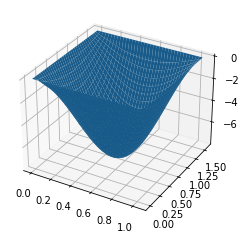

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, U[:,:,-1])